In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
# Loading dataset into DataFrame
# = pd.read_csv('hotel_bookings(1).csv')
hotel_df = pd.read_csv('hotel_bookings.csv')

# Inspecting first few rows of the dataset
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [3]:
# Checking for missing values in critical columns
hotel_df[['is_canceled', 'lead_time', 'market_segment']].isnull().sum()

is_canceled       6
lead_time         1
market_segment    0
dtype: int64

In [4]:
# Data Cleaning: Removing rows with missing values in essential columns
hotel_df_clean = hotel_df.dropna(subset=['is_canceled', 'lead_time']).copy()

# Confirming the removal of missing values
hotel_df_clean[['is_canceled', 'lead_time', 'market_segment']].isnull().sum()


is_canceled       0
lead_time         0
market_segment    0
dtype: int64

In [5]:
# Grouping 'lead_time' into meaningful intervals
bins = range(0, 801, 50)  # Intervals of 50 days, accommodating higher values
hotel_df_clean['lead_time_group'] = pd.cut(
    hotel_df_clean['lead_time'], 
    bins=bins, 
    right=False,
    include_lowest=True
)

# Inspecting grouped lead_time data
hotel_df_clean[['lead_time', 'lead_time_group']].head(10)

,lead_time,lead_time_group
0,342.0,"[300, 350)"
1,737.0,"[700, 750)"
2,7.0,"[0, 50)"
3,13.0,"[0, 50)"
4,14.0,"[0, 50)"
5,14.0,"[0, 50)"
6,0.0,"[0, 50)"
7,9.0,"[0, 50)"
8,85.0,"[50, 100)"
9,75.0,"[50, 100)"


In [6]:
# Calculating Cancellation Rates by Lead Time and Market Segment
cancellation_rates = (
    hotel_df_clean
    .groupby(['lead_time_group', 'market_segment'])
    .agg(cancellation_rate=('is_canceled', 'mean'))
    .reset_index()
)

pivot_cancellation = cancellation_rates.pivot(
    index='lead_time_group',
    columns='market_segment',
    values='cancellation_rate'
)

pivot_cancellation.head(10)

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_82930/3636210524.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['lead_time_group', 'market_segment'])


market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline Travel Agent,Online Travel Agent,Online travel agent,Undefined
lead_time_group,,,,,,,,,
"[0, 50)",0.219409,0.119942,0.147545,0.126176,0.321429,0.206693,0.261336,0.844660,1.0
"[50, 100)",NaN,0.285714,0.411306,0.204629,0.601616,0.301277,0.405456,0.803030,NaN
"[100, 150)",NaN,0.363636,0.517241,0.199015,0.636966,0.377072,0.438120,0.923077,NaN
"[150, 200)",NaN,0.000000,0.672414,0.180838,0.617817,0.404148,0.467124,0.911765,NaN
"[200, 250)",NaN,NaN,0.833333,0.256250,0.527714,0.429024,0.499681,0.956522,NaN
"[250, 300)",NaN,0.000000,1.000000,0.227778,0.757320,0.441667,0.571795,0.900000,NaN
"[300, 350)",NaN,0.000000,0.062500,0.440000,0.785075,0.604258,0.654018,0.600000,NaN
"[350, 400)",NaN,0.000000,NaN,0.714286,0.778166,0.387755,0.811966,NaN,NaN
"[400, 450)",NaN,NaN,NaN,NaN,0.731783,0.527066,1.000000,NaN,NaN


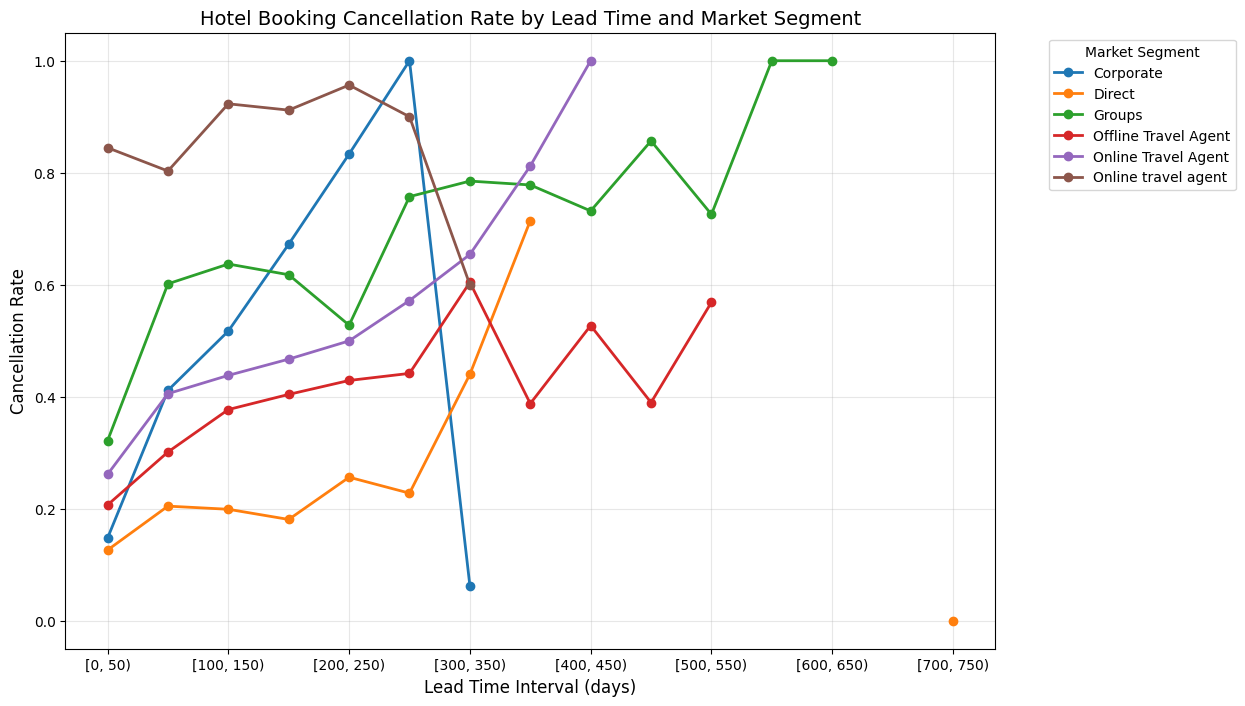

In [7]:
import matplotlib.pyplot as plt

# Visualization of Cancellation Rates by Lead Time and Market Segment
plt.figure(figsize=(12, 8))

# Selecting segments with sufficient data for clear visualization
segments_to_plot = pivot_cancellation.columns.drop(['Undefined', 'Complementary', 'Aviation'])
pivot_cancellation[segments_to_plot].plot(marker='o', linewidth=2, ax=plt.gca())

# Labels and Title
plt.xlabel('Lead Time Interval (days)', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.title('Hotel Booking Cancellation Rate by Lead Time and Market Segment', fontsize=14)

# Formating x-axis interval labels
interval_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in pivot_cancellation.index]

# Legend and Grid
plt.legend(title='Market Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)


### Mini-Report

This report explores how **lead time**, the number of days between the date a hotel reservation is made and the guest's arrival date, influences the likelihood of booking cancellations. Additionally, the analysis examines if this relationship varies across different **market segments**, such as direct bookings, corporate clients, and online travel agents.

Analyzing cancellation patterns is crucial for hotel businesses because cancellations directly impact revenue management, resource allocation, and profitability. By anticipating cancellations more accurately, hotel managers can refine their forecasting models, optimize room availability, and develop targeted pricing and marketing strategies.

The analysis leveraged three key attributes from the dataset: `is_canceled`, which explicitly indicates cancellations; `lead_time`, reflecting booking behavior relative to arrival dates; and `market_segment`, allowing insights into different customer types.

The findings clearly demonstrate that bookings with longer lead times generally have higher cancellation rates. However, significant differences emerged across market segments. Bookings made through online travel agencies exhibited particularly high cancellation rates at longer lead times, suggesting speculative reservation behavior. Conversely, direct and corporate bookings consistently showed lower cancellation rates, indicating stronger customer commitment.

These insights suggest that hotels could implement segment-specific strategies, such as stricter cancellation policies or targeted promotions, particularly focusing on reducing cancellations from online agency bookings made far in advance.


Overall mark: 60

#### Business Question:
The business question is clearly stated and is connected to the given dataset. The importance of answering the question is explained as well. Solid evidence is presented to support the findings and implications, despite that the analysis is relatively simple.

<u>Very Good</u>

#### Data:
Three key variables, is_canceled, lead_time and market_segment, are effectively used to answer the proposed question. Basic explaination of these variables are provided, but the rationale of choosing the variables to answer the specific question is not addressed explicitly. Effective data filtering and data grouping are used, which shows good understanding of data manipulation. Improvements could include explaining the reasons of each data manipulation more clearly.

<u>Good</u>

#### Visualization:
A basic dotted line plot is used for the visualization purpose. The plot comes with essential elements of the title, axis labels and ticks. Necessary legends are also available. However, the choice of using dotted lines is not informative enough. Consider to use bar plot to make the information more clear. In addition, different market segment seems covers different lead time interval groups, which requires explanation.

<u>Good</u>

#### Code:
The code is clean and smooth to read. There are no obvious errors, except a minor issue in importing the data file (you should use 'hotel_bookings.csv' as provided, instead of your own file name that exists only on your machine). Necessary comments are availabel along with the code. To improve the readability, it is suggested to supress those exploratory code that does not contribute to the analysis.

<u>Good</u>